## Ridge Regression:

$$\sum_{i=1}^M (y_i - \hat{y}_i)^2 = \sum_{i=1}^M (y_i - \sum_{j=0}^p w_j x_{ij})^2 + \lambda \sum_{j=0}^p w_j^2$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
class LinearRegression:
    def __init__(self, alpha = 0.01, n_iters = 1500):
        self.alpha   = alpha
        self.n_iters = n_iters
        self.weights = None
        self.bias    = None
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        n_rows, n_features = X.shape
        self.weights          = np.zeros(n_features) 
        self.bias             = 0

        for _ in range(self.n_iters):
            Y_hat = self.predict(X)
            w = (1 / n_rows) * np.dot(X.T, (Y_hat - y))
            b = (1 / n_rows) * np.sum(Y_hat - y)

            self.weights -= self.alpha * w
            self.bias    -= self.alpha * b


In [3]:
class RidgeRegression(LinearRegression):
    def __init__(self, alpha = 0.01, n_iters = 1500, lambda_val = 0.1):
        super().__init__(alpha, n_iters)
        self.lambda_val = lambda_val
    

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        n_rows, n_features = X.shape
        self.weights          = np.zeros(n_features)
        self.bias             = 0

        for _ in range(self.n_iters):
            y_predicted = self.predict(X)
            w = (1 / n_rows) * np.dot(X.T, (y_predicted - y)) + self.lambda_val * (self.weights ** 2)
            b = (1 / n_rows) * np.sum(y_predicted - y)

            self.weights -= self.alpha * w
            self.bias    -= self.alpha * b

In [4]:
data = pd.read_csv('data 2.csv')

input_data = data.drop('y', axis = 1)
output_data = data['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 1)

In [6]:
input_data = np.array(input_data)

X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
ridge_model = RidgeRegression()
ridge_model.fit(X_train, y_train)

In [8]:
y_test_pred = ridge_model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_test_pred)

r2 = r2_score(y_test, y_test_pred)

print(f'mse = {mse}')
print(f'r2  = {r2}')

mse = 9.968118041064349
r2  = 0.6872907535923641


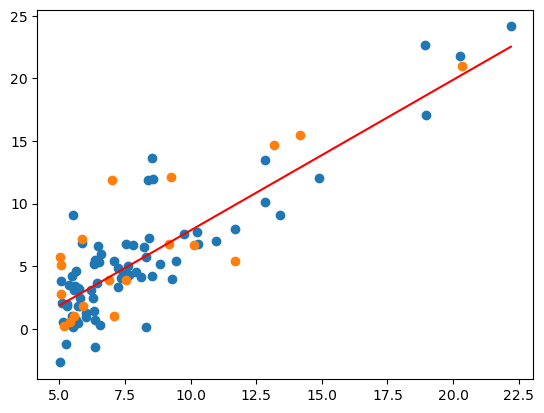

In [10]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

xline = [min(input_data), max(input_data)]
yline = [ridge_model.predict(x) for x in xline]

plt.plot(xline, yline, 'r-')

plt.show()

## using **Ridge** from Sklearn

In [11]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f'mse = {mse}')
print(f'r2  = {r2}')

mse = 10.069970712728077
r2  = 0.6840955394035515
